In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import time
from scipy.optimize import curve_fit

# Showing in Latex
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

In [2]:
from PPRM_Optimization_of_NEQR import PPRM, mcnot_qc, mcnotR_qc, QC_old, QC

In [3]:
opt_file = 'opt_file.csv'
opt_file_R = 'opt_file_R.csv'

$$ \textbf{Calculating the QC Optimization Rates of Random Images Sized} \\
2^{1} \times 2^{1} \textbf{ to } 2^{11} \times 2^{11} \\
\textbf{and Saving Them into opt_file and opt_file_R} $$

In [ ]:
for num_ctrl_qubits in range(2, 23):
    image = np.random.randint(low = 0, high = 256,
                              size=(2**num_ctrl_qubits, 1), dtype=np.uint8)
    
    QC_opt_rate = QC_old(image, mcnot_qc) / QC(image, mcnot_qc)
    QC_opt_rate_R = QC_old(image, mcnotR_qc) / QC(image, mcnotR_qc)
    
    with open(opt_file, 'ab') as f:  
        np.savetxt(f, [QC_opt_rate], fmt="%.3e", delimiter='\n')
    with open(opt_file_R, 'ab') as f:  
        np.savetxt(f, [QC_opt_rate_R], fmt="%.3e", delimiter='\n')
        


### Loading Data

In [4]:
QC_opt_rates = np.loadtxt(opt_file)
QC_opt_rates_R = np.loadtxt(opt_file_R)

In [5]:
QC_Comp_Ratio = (1-(1 / QC_opt_rates))*100
QC_Comp_Ratio_R = (1-(1 / QC_opt_rates_R))*100

In [6]:
x = np.arange(2, 23) # Number of Control Qubits

# QC Optimization Rate and Compression Ratio Using MCNOT

## Approximation

$$ QC\_opt\_rates\_App(x) = a^x + b \qquad QC\_Comp\_Ratio\_App(x) = -a^{-(bx + c)} + d $$

In [7]:
# QC_opt_rates Approximation
def QC_opt_rates_App(x, a, b):
    return a**x + b
popt_QC_opt_rates, _ = curve_fit(f=QC_opt_rates_App, xdata=x, ydata=QC_opt_rates)
print('QC_opt_rates Approximate Parameters:', popt_QC_opt_rates)

def QC_Comp_Ratio_App(x, a, b, c, d):
    return -1/(a**(b*x + c )) + d
popt_QC_Comp_Ratio, _ = curve_fit(f=QC_Comp_Ratio_App, xdata=x, ydata=QC_Comp_Ratio)
print('QC_Comp_Ratio Approximate Parameters:', popt_QC_Comp_Ratio)


QC_opt_rates Approximate Parameters: [1.33325795 0.48691487]
QC_Comp_Ratio Approximate Parameters: [  2.42614405   0.23528991  -4.54493516 100.89119385]


/tmp/ipykernel_6151/1016531703.py:8: RuntimeWarning: divide by zero encountered in divide
  return -1/(a**(b*x + c )) + d


## Graph

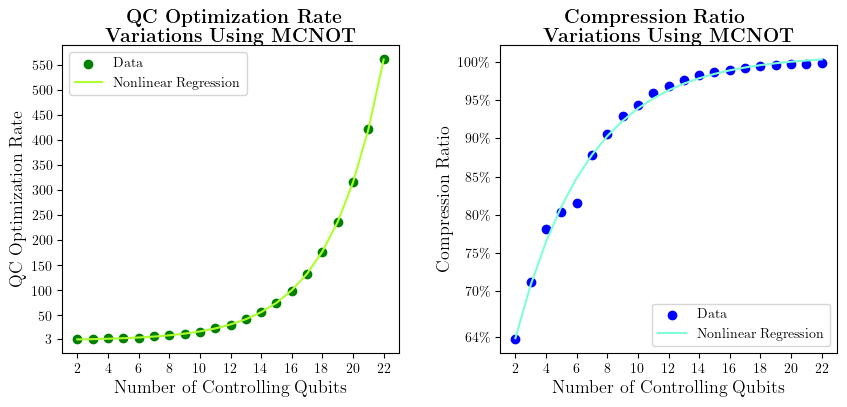

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


############## QC Optimization Rate ##################################

ax1.scatter(x, QC_opt_rates, color='green') 

# Approximation
ax1.plot(x, QC_opt_rates_App(x, *popt_QC_opt_rates), 'greenyellow')

# Setting the Axises' Labels
yticks = [3]
yticks = yticks + [i for i in range(50, 551, 50)]
xticks = np.arange(2, 23, 2)

ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.set_xlabel(r'{Number of Controlling Qubits}', fontsize=13)
ax1.set_ylabel(r'{QC\ Optimization\ Rate}', fontsize=13)
ax1.set_title(r'\textbf{QC\ Optimization\ Rate \\ Variations\ Using MCNOT}', fontsize=14)

ax1.legend(['Data', 'Nonlinear Regression'])

############## Compression Ratio ##################################

ax2.scatter(x, QC_Comp_Ratio, color='blue') 

# Approximation
ax2.plot(x, QC_Comp_Ratio_App(x, *popt_QC_Comp_Ratio), 'aquamarine')

# Regulating the Axises' Labels
xticks = np.arange(2, 23, 2)
yticks = [64]
yticks = yticks + [i for i in range(70, 101, 5)]

ax2.set_xticks(xticks)
ax2.set_yticks(yticks)
ax2.set_xlabel(r'{Number of Controlling Qubits}', fontsize=13)
ax2.set_ylabel(r'{Compression\ Ratio}', fontsize=13)
ax2.set_title(r'\textbf{Compression\ Ratio \\ Variations\ Using MCNOT}', fontsize=14)

ax2.legend(['Data', 'Nonlinear Regression'], loc="lower right")

ax2.yaxis.set_major_formatter(PercentFormatter(100, decimals=0))

######################################################################

plt.subplots_adjust(wspace=0.3)

fig.savefig('QC_Opt', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format='pdf',
        transparent=False, bbox_inches='tight', pad_inches=.1,
        )

plt.show()

# QC Optimization Rate and Compression Ratio Using MCNOT-R

## Approximation

$$ QC\_opt\_rates\_R\_App(x) = a^{-(bx+c)} + d $$

In [9]:
def QC_opt_rates_R_App(x, a, b, c, d):
    return 1/(a**(b*x + c)) + d

# To estimate, we need to alter some data to have a less variance
QC_opt_rates_R_modified = QC_opt_rates_R.copy()
QC_opt_rates_R_modified[0] = 4
QC_opt_rates_R_modified[2] = 3.6
QC_opt_rates_R_modified[4] = 3.1

popt_QC_opt_rates_R, _ = curve_fit(f=QC_opt_rates_R_App, xdata=x, ydata=QC_opt_rates_R_modified)
print('QC_opt_rates_R Approximate Parameters:', popt_QC_opt_rates_R)

# To estimate, we need to alter some data to have a less variance
QC_Comp_Ratio_R_modified = QC_Comp_Ratio_R.copy()
QC_Comp_Ratio_R_modified[0] = 78
QC_Comp_Ratio_R_modified[2] = 73
QC_Comp_Ratio_R_modified[4] = 68

popt_QC_Comp_Ratio_R, _ = curve_fit(f=QC_opt_rates_R_App, xdata=x, ydata=QC_Comp_Ratio_R_modified)
print('QC_Comp_Ratio_R Approximate Parameters:', popt_QC_Comp_Ratio_R)


QC_opt_rates_R Approximate Parameters: [ 1.12164784  1.60225229 -9.45095345  2.10042125]
QC_Comp_Ratio_R Approximate Parameters: [ 1.8227752   0.23766422 -5.92724151 52.27379246]


/tmp/ipykernel_6151/2191604141.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/(a**(b*x + c)) + d
/tmp/ipykernel_6151/2191604141.py:2: RuntimeWarning: overflow encountered in divide
  return 1/(a**(b*x + c)) + d


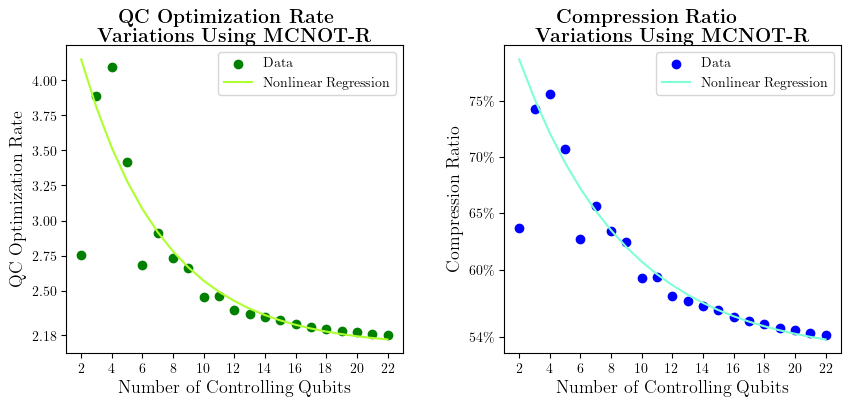

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


############## QC Optimization Rate ##################################

ax1.scatter(x, QC_opt_rates_R, color='green') 

# Approximation
ax1.plot(x, QC_opt_rates_R_App(x, *popt_QC_opt_rates_R), 'greenyellow')

# Regulating the Axises' Labels
yticks = np.array([2.181])
yticks = np.append(yticks, np.linspace(2.5, 4.0, 7))
xticks = np.arange(2, 23, 2)

ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.set_xlabel(r'{Number of Controlling Qubits}', fontsize=13)
ax1.set_ylabel(r'{QC\ Optimization\ Rate}', fontsize=13)
ax1.set_title(r'\textbf{QC\ Optimization\ Rate \\ Variations\ Using MCNOT-R}', fontsize=14)

ax1.legend(['Data', 'Nonlinear Regression'], loc="upper right")


############## Compression Ratio ##################################

ax2.scatter(x, QC_Comp_Ratio_R, color='blue') 

# Approximation
ax2.plot(x, QC_opt_rates_R_App(x, *popt_QC_Comp_Ratio_R), 'aquamarine')

# Regulating the Axises' Labels
xticks = np.arange(2, 23, 2)
yticks = [i for i in range(60, 76, 5)]
yticks = yticks + [54]

ax2.set_xticks(xticks)
ax2.set_yticks(yticks)
ax2.set_xlabel(r'{Number of Controlling Qubits}', fontsize=13)
ax2.set_ylabel(r'{Compression\ Ratio}', fontsize=13)
ax2.set_title(r'\textbf{Compression\ Ratio \\ Variations\ Using MCNOT-R}', fontsize=14)

ax2.legend(['Data', 'Nonlinear Regression'], loc="upper right")

ax2.yaxis.set_major_formatter(PercentFormatter(100, decimals=0))

######################################################################

plt.subplots_adjust(wspace=0.3)

fig.savefig('QC_Opt_R', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format='pdf',
        transparent=False, bbox_inches='tight', pad_inches=.1,
        )

plt.show()